<a href="https://colab.research.google.com/github/WelingtonAguiar1987/Nasdaq_futuros/blob/main/Estudos_Volatilidades_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESTUDOS DE VOLATILIDADES 2024:

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
-------------------------------------
Desvio Padrão: 86.16 Pontos.
Meio Desvio Padrão: 43.08 Pontos.
Range de Hoje: ......... 303.00.
Total de pregões analisados: 269.
Data inicial do contrato: 2022-12-16.
Data final do contrato: 2024-03-15.
Cálculo para Daytrade no dia:
 2024-01-11.
Gráfico visualizado entre os dias:
 2024-01-10 ao 2024-01-12.
-------------------------------------
-------------------------------------
|    RELATÓRIO DE DESVIO PADRÃO:    |
-------------------------------------
| + 2 DP: ................ 17117.58 |
-------------------------------------
| + 1 e Meio DP: ......... 17074.49 |
-------------------------------------
| + 1 DP: ................ 17031.41 |
-------------------------------------
| + Meio DP: ............. 16988.33 |
-------------------------------------
| Preço Último Fechamento: 16945.25 |
---------------------

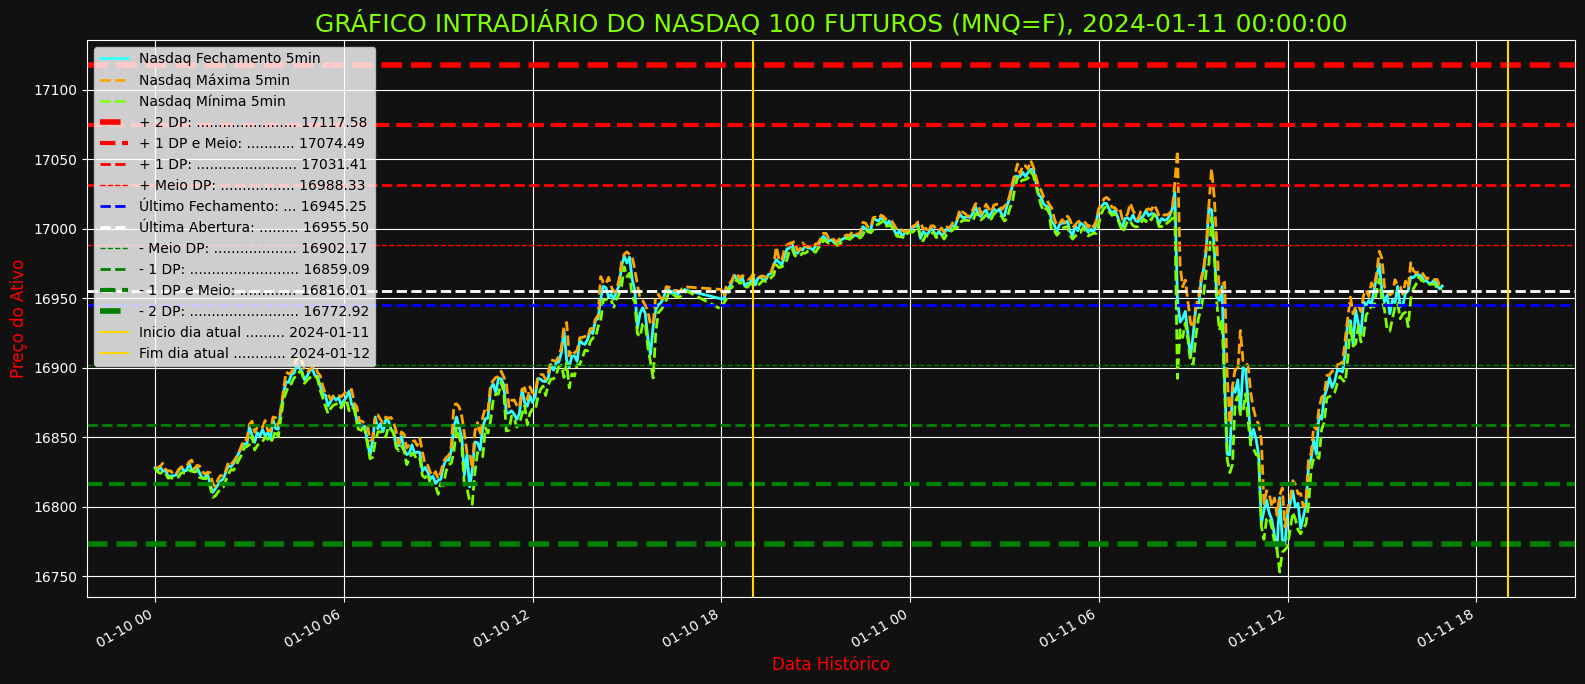

In [ ]:
#BIBLIOTECAS IMPORTADAS:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import datetime
from datetime import timedelta

# FUNÇÃO CRIAR LINHAS:
def linha():
    print('-' * 37)

# SIGLA E NOME DO ATIVO ANALISADO:
sigla_ativo = "MNQ=F"
nome_ativo = "NASDAQ 100 FUTUROS"

# DEMARCAÇÃO NO GRÁFICO DO DIA ATUAL:
adicao_data_marcacao = timedelta(1)
inicio_marcacao = data_hoje
final_marcacao = data_hoje + adicao_data_marcacao

# DADOS HISTÓRICOS PERÍODO DE VENCIMENTO:
data_inicial_vencimento = '2022-12-16'
data_final_vencimento = '2024-03-15'

dados_historico_vencimento = yf.download(sigla_ativo, data_inicial_vencimento, data_final_vencimento, interval='1d')
dados_historico_vencimento['Volatilidade'] = dados_historico_vencimento['High'] - dados_historico_vencimento['Low']

# FILTRO DE TODO O PERÍODO DE VENCIMENTO:
periodo_vencimento_filtrado = dados_historico_vencimento['Volatilidade'][0:-1]

# QUANTIDADE DE PREGÃO NO PERÍODO:
quantidade_pregao = dados_historico_vencimento['Close'].count()

# CÁLCULO DO DESVIO PADRÃO DE TODO ESSE VENCIMENTO:
desvio_padrao = np.std(periodo_vencimento_filtrado)
meio_desvio_padrao = desvio_padrao / 2


# DADOS HISTÓRICOS PERÍODO INTRADAY:
adicao_data_intraday = timedelta(1)
subtracao_data_intraday = timedelta(1)
data_inicio_intraday = data_hoje + adicao_data_intraday
data_final_intraday = data_hoje + subtracao_data_intraday

data_hoje = datetime.date.today()
data_hoje.isoformat()

dados_historico_intraday = yf.download(sigla_ativo, data_inicial_intraday, data_final_intraday, interval='5m')

maxima = dados_historico_intraday['High']

minima = dados_historico_intraday['Low']


# RANGE DO DIA:
dados_historico_vencimento['range'] = dados_historico_vencimento['High'] - dados_historico_vencimento['Low']
range_do_dia = dados_historico_vencimento['range'][-1]



# DATA DO PREGÃO ATUAL:
pregao_atual = dados_historico_vencimento.index[-1]

# PREÇO DO ÚLTIMO FECHAMENTO E ÚLTIMA ABERTURA:
# PREENCHER OS VALORES ABAIXO:

preco_ultimo_fechamento = dados_historico_vencimento['Close'][-2]
ultima_abertura = dados_historico_vencimento['Open'][-1]

# CÁLCULO PARA ANÁLISE DESVIO PADRÃO:*
mais_2dp = (preco_ultimo_fechamento + (desvio_padrao * 2))
mais_1dp_e_meio = (preco_ultimo_fechamento + (meio_desvio_padrao * 3))
mais_1dp = (preco_ultimo_fechamento + (desvio_padrao))
mais_meio_desvio_padrao = (preco_ultimo_fechamento + meio_desvio_padrao)


menos_meio_desvio_padrao = (preco_ultimo_fechamento - meio_desvio_padrao)
menos_1dp = (preco_ultimo_fechamento - (desvio_padrao))
menos_1dp_e_meio = (preco_ultimo_fechamento - (meio_desvio_padrao * 3))
menos_2dp = (preco_ultimo_fechamento - (desvio_padrao * 2))

# DADOS DO CONTRATO:
linha()
print(f'Desvio Padrão: {desvio_padrao:.2f} Pontos.')
print(f'Meio Desvio Padrão: {meio_desvio_padrao:.2f} Pontos.')
print(f'Range de Hoje: ......... {range_do_dia:.2f}.')
print(f'Total de pregões analisados: {quantidade_pregao}.')
print(f'Data inicial do contrato: {data_inicial_vencimento}.')
print(f'Data final do contrato: {data_final_vencimento}.')
print(f'Cálculo para Daytrade no dia:\n {data_hoje}.')
print(f'Gráfico visualizado entre os dias:\n {data_inicial_intraday} ao {data_final_intraday}.')
linha()

# RELATÓRIO PREÇOS COM DESVIO PADRÃO:
linha()
print('|    RELATÓRIO DE DESVIO PADRÃO:    |')
linha()
print(f'| + 2 DP: ................ {mais_2dp:.2f} |')
linha()
print(f'| + 1 e Meio DP: ......... {mais_1dp_e_meio:.2f} |')
linha()
print(f'| + 1 DP: ................ {mais_1dp:.2f} |')
linha()
print(f'| + Meio DP: ............. {mais_meio_desvio_padrao:.2f} |')
linha()
print(f'| Preço Último Fechamento: {preco_ultimo_fechamento:.2f} |')
linha()
print(f'| Última Abertura: ....... {ultima_abertura:.2f} |')
linha()
print(f'| - Meio DP: ............. {menos_meio_desvio_padrao:.2f} |')
linha()
print(f'| - 1 DP: ................ {menos_1dp:.2f} |')
linha()
print(f'| - 1 e Meio DP: ......... {menos_1dp_e_meio:.2f} |')
linha()
print(f'| - 2 DP: ................ {menos_2dp:.2f} |')
linha()



# PLOTAR GRÁFICO INTRADAY DO ATIVO ANALISADO:
grafico = plt.figure(figsize=(19.2, 8.2), facecolor='#111111')
ax = plt.axes()
ax.set_facecolor('#111111')
dados_historico_intraday['Adj Close'].plot(label='Nasdaq Fechamento 5min', lw=2, color= '#33ffff')



maxima.plot(label='Nasdaq Máxima 5min', ls='--', lw=2, color= 'orange')


minima.plot(label='Nasdaq Mínima 5min', ls='--', lw=2, color= '#7fff00')

plt.title(f"GRÁFICO INTRADIÁRIO DO {nome_ativo} ({sigla_ativo}), {pregao_atual}", color='#7fff00', fontsize=18 )
plt.ylabel('Preço do Ativo', color='r', fontsize=12)
plt.xlabel('Data Histórico', color='r', fontsize=12)
plt.axhline(mais_2dp, color='r', ls='--', lw=4, label=f'+ 2 DP: ....................... {mais_2dp:.2f}')
plt.axhline(mais_1dp_e_meio, color='r', lw=3, ls='--', label=f'+ 1 DP e Meio: ........... {mais_1dp_e_meio:.2f}')
plt.axhline(mais_1dp, color='r', ls='--', lw=2, label=f'+ 1 DP: ....................... {mais_1dp:.2f}')
plt.axhline(mais_meio_desvio_padrao, color='r', lw=1, ls='--', label=f'+ Meio DP: ................. {mais_meio_desvio_padrao:.2f}')
plt.axhline(preco_ultimo_fechamento, color='blue', ls='--', lw=2, label=f'Último Fechamento: ... {preco_ultimo_fechamento:.2f}')
plt.axhline(ultima_abertura, color='white', ls='--', lw=2, label=f'Última Abertura: ......... {ultima_abertura:.2f}')
plt.axhline(menos_meio_desvio_padrao, color='g', lw=1, ls='--', label=f'- Meio DP: ................... {menos_meio_desvio_padrao:.2f}')
plt.axhline(menos_1dp, color='g', ls='--', lw=2, label=f'- 1 DP: ......................... {menos_1dp:.2f}')
plt.axhline(menos_1dp_e_meio, color='g', lw=3, ls='--', label=f'- 1 DP e Meio: ............. {menos_1dp_e_meio:.2f}')
plt.axhline(menos_2dp, color='g', ls='--', lw=4, label=f'- 2 DP: ......................... {menos_2dp:.2f}')



# ESSE FILTRO, NO GRÁFICO, INICIA-SE APÓS MEIA NOITE (00:00), E TERMINA A MEIA NOITE (00:00) DO DIA DO FILTRO FINAL:
plt.axvline(inicio_marcacao, color='#ffd700', label=f'Inicio dia atual ......... {inicio_marcacao}')
plt.axvline(final_marcacao, color='#ffd700', label=f'Fim dia atual ............ {final_marcacao}')
plt.grid(axis='x', color='white')
plt.grid(axis='y', color='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='x', colors='white')
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w')
ax.spines['left'].set_color('w')
ax.spines['right'].set_color('w')
plt.legend(facecolor='w', frameon=True, framealpha=0.8)
plt.show()

In [ ]:
# Gráfico interativo do Nasdaq:

fig = go.Figure(data=[go.Candlestick(x=dados_historico_intraday.index,
                open=dados_historico_intraday['Open'],
                high=dados_historico_intraday['High'],
                low=dados_historico_intraday['Low'],
                close=dados_historico_intraday['Close'])])


fig.add_hline(mais_2dp, line=dict(color='red'))
fig.add_hline(mais_1dp_e_meio, line=dict(color='red'))
fig.add_hline(mais_1dp, line=dict(color='red'))
fig.add_hline(mais_meio_desvio_padrao, line=dict(color='red'))
fig.add_hline(preco_ultimo_fechamento, line=dict(color='blue'))
fig.add_hline(ultima_abertura)
fig.add_hline(menos_meio_desvio_padrao, line=dict(color='green'))
fig.add_hline(menos_1dp, line=dict(color='green'))
fig.add_hline(menos_1dp_e_meio, line=dict(color='green'))
fig.add_hline(menos_2dp, name=('2dp'), line=dict(color='green'))
fig.update_layout(title='Nasdaq Futuros', xaxis_title='Data Histórico',
yaxis_title='Preço Ativo', template = 'plotly_dark')

#showlegend = True

#fig.add_annotation(y=mais_2dp, align= "right", text= f'{mais_2dp:.2f}')
#fig.add_annotation(y=mais_1dp_e_meio , align= "right", text= f'{mais_1dp_e_meio:.2f}')

fig.show()

In [ ]:
dados_historico_vencimento.tail(5)

,Open,High,Low,Close,Adj Close,Volume,Volatilidade,range
Date,,,,,,,,
2024-01-05,16454.00,16577.00,16334.25,16460.25,16460.25,1098485,242.75,242.75
2024-01-08,16472.25,16811.50,16378.25,16803.75,16803.75,880010,433.25,433.25
2024-01-09,16790.00,16868.50,16658.50,16830.25,16830.25,1023133,210.00,210.00
2024-01-10,16829.50,16983.25,16801.75,16945.25,16945.25,1023133,181.50,181.50
2024-01-11,16955.50,17056.00,16753.00,16958.75,16958.75,1370416,303.00,303.00
